In [8]:
import cv2
import numpy as np


img = cv2.imread('temp/temp_paddle_paddle/0/661_3069_745_3180.png', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.round(detected_circles[0, :]).astype(int).tolist()
  
    verify_x, verify_y, verify_r = [38, 66, 20]
    # for (x, y, r) in detected_circles:
    #     verify_x, verify_y, verify_r = [x, y, r] if abs(x - x_center) < abs(verify_x - x_center) else [verify_x, verify_y, verify_r]

    x1 = verify_x - verify_r
    y1 = verify_y - verify_r
    x2 = verify_x + verify_r
    y2 = verify_y + verify_r
    cropped_circle = img[y1:y2, x1:x2]

detected_circles

[[38, 66, 20], [36, 26, 12]]

In [12]:
img.shape

(165, 74, 3)

In [70]:
134*148

19832

In [54]:
detected_circles

[[134, 148, 39]]

In [9]:
from PIL import Image

Image.fromarray(cropped_circle).size

(40, 40)

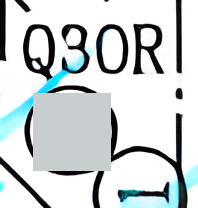

In [3]:
mask = np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8)
mask[y1:y2,x1:x2] = 255
# Inpaint the object
inpaint_img = np.copy(img)
inpaint_img[y1:y2, x1:x2] = np.mean(inpaint_img[:, :, :], axis=(0, 1))
Image.fromarray(inpaint_img)

In [ ]:
!python infer.py \
    --input_images_dir=/your_path_to/test_images \
    --det_model_path=your_path_to/output.mindir \
    --det_model_name_or_config=../../configs/det/dbnet/db_r50_icdar15.yaml \
    --res_save_dir=results_dir

In [1]:
from craft_text_detector import Craft

# set image path and export folder directory
image = 'temp/temp_char/0/592_2469_664_2562.png' # can be filepath, PIL image or numpy array
output_dir = 'outputs/'
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)
prediction_result = craft.detect_text(image)

/home/bu0ai/anaconda3/envs/shiba/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bu0ai/anaconda3/envs/shiba/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Craft text detector weight will be downloaded to /home/bu0ai/.craft_text_detector/weights/craft_mlt_25k.pth


Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg5IHr4J
To: /home/bu0ai/.craft_text_detector/weights/craft_mlt_25k.pth
100%|██████████| 83.2M/83.2M [00:06<00:00, 13.5MB/s]


Craft text refiner weight will be downloaded to /home/bu0ai/.craft_text_detector/weights/craft_refiner_CTW1500.pth


Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: /home/bu0ai/.craft_text_detector/weights/craft_refiner_CTW1500.pth
100%|██████████| 1.85M/1.85M [00:00<00:00, 13.3MB/s]


In [2]:
prediction_result

{'boxes': array([[[12.3184595,  3.6919527],
         [18.822395 ,  4.1846743],
         [17.675087 , 19.32915  ],
         [11.17115  , 18.836428 ]],
 
        [[24.557812 ,  4.359375 ],
         [39.815624 ,  4.359375 ],
         [39.815624 , 22.66875  ],
         [24.557812 , 22.66875  ]]], dtype=float32),
 'boxes_as_ratios': array([[[0.17108972, 0.03969842],
         [0.26142216, 0.0449965 ],
         [0.24548732, 0.20784031],
         [0.15515486, 0.20254223]],
 
        [[0.34108072, 0.046875  ],
         [0.55299478, 0.046875  ],
         [0.55299478, 0.24375001],
         [0.34108072, 0.24375001]]]),
 'polys': array([array([[12.3184595,  3.6919527],
               [18.822395 ,  4.1846743],
               [17.675087 , 19.32915  ],
               [11.17115  , 18.836428 ]], dtype=float32),
        array([[24.557812,  4.359375],
               [39.815624,  4.359375],
               [39.815624, 22.66875 ],
               [24.557812, 22.66875 ]], dtype=float32)], dtype=object),
 'poly

In [2]:
!wget https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_db_v2.0_train.tar

--2024-06-27 15:50:11--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_db_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 436234240 (416M) [application/x-tar]
Saving to: ‘det_r50_vd_db_v2.0_train.tar’

det_r50_vd_db_v2.0_ 100%[===================>] 416.03M  2.23MB/s    in 3m 14s  

2024-06-27 15:53:25 (2.15 MB/s) - ‘det_r50_vd_db_v2.0_train.tar’ saved [436234240/436234240]



In [5]:
!wget https://download.mindspore.cn/toolkits/mindocr/dbnet/dbnetpp_resnet50-068166c2-9934aff0.mindir

--2024-06-27 17:02:41--  https://download.mindspore.cn/toolkits/mindocr/dbnet/dbnetpp_resnet50-068166c2-9934aff0.mindir
Resolving download.mindspore.cn (download.mindspore.cn)... 124.70.126.200, 124.70.125.182, 124.70.125.200, ...
Connecting to download.mindspore.cn (download.mindspore.cn)|124.70.126.200|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://download-mindspore.osinfra.cn/toolkits/mindocr/dbnet/dbnetpp_resnet50-068166c2-9934aff0.mindir [following]
--2024-06-27 17:02:43--  https://download-mindspore.osinfra.cn/toolkits/mindocr/dbnet/dbnetpp_resnet50-068166c2-9934aff0.mindir
Resolving download-mindspore.osinfra.cn (download-mindspore.osinfra.cn)... 116.205.4.167, 116.205.4.45, 116.205.4.175, ...
Connecting to download-mindspore.osinfra.cn (download-mindspore.osinfra.cn)|116.205.4.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102684853 (98M) [application/octet-stream]
Saving to: ‘dbnetpp_resnet50-0

Traceback (most recent call last):
  File "/mnt/d/docker_volume/room_of_nhanhuynh/ai_butler/CAD-ShibaSangyo/full_build_from_scratch_nhanhuynh/mindocr/deploy/py_infer/infer.py", line 7, in <module>
    from src import infer_args  # noqa
  File "/mnt/d/docker_volume/room_of_nhanhuynh/ai_butler/CAD-ShibaSangyo/full_build_from_scratch_nhanhuynh/mindocr/deploy/py_infer/src/infer_args.py", line 5, in <module>
    from .infer import TaskType
  File "/mnt/d/docker_volume/room_of_nhanhuynh/ai_butler/CAD-ShibaSangyo/full_build_from_scratch_nhanhuynh/mindocr/deploy/py_infer/src/infer/__init__.py", line 3, in <module>
    from .infer_cls import TextClassifier
  File "/mnt/d/docker_volume/room_of_nhanhuynh/ai_butler/CAD-ShibaSangyo/full_build_from_scratch_nhanhuynh/mindocr/deploy/py_infer/src/infer/infer_cls.py", line 6, in <module>
    from ..data_process import build_postprocess, build_preprocess, cv_utils, gear_utils
  File "/mnt/d/docker_volume/room_of_nhanhuynh/ai_butler/CAD-ShibaSangyo/full_b